In [248]:
import sdf_helper as sh
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import colors
import sdf
plt.rcParams["font.size"]=13
plt.rcParams["figure.figsize"]=(10,8)
import imageio as imageio
import glob

In [249]:
def getEr(lambd):
    m = 9.10938356e-31
    q = 1.60217662e-19
    c = 299792458
    w = 2*np.pi*c/lambd
    return m*w*c/q

In [250]:
Er = getEr(1e-6)
Er

3210701072782.3525

In [251]:
EXTENT = [-4, 4, -4, 4]
all_files = [f for f in os.listdir(".") if f.endswith(".sdf")]

In [252]:
data = sdf.read(all_files[0])

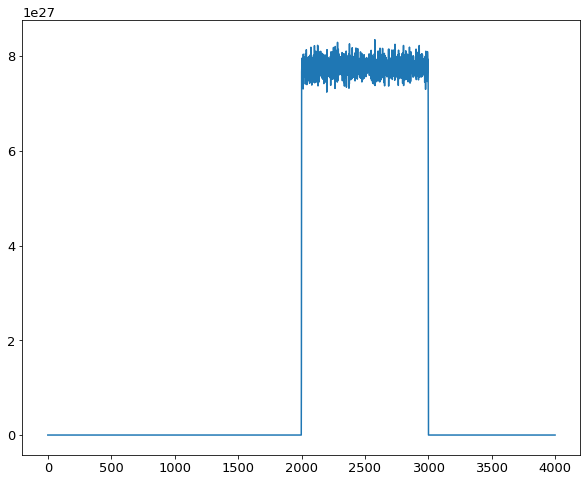

In [253]:
plt.plot(data.Derived_Number_Density_Electron.data)

In [254]:
def get_field(id, component="y"):
    raw_data = sdf.read(all_files[id])
    comp = {
        "x": raw_data.Electric_Field_Ex,
        "y": raw_data.Electric_Field_Ey,
        "z": raw_data.Electric_Field_Ez,
    }
    field = comp[component].data
    return field

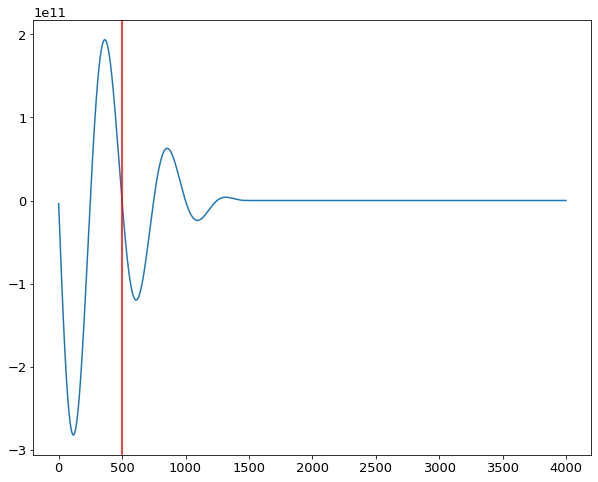

In [255]:
Ey = get_field(10)
plt.plot(Ey)
plt.axvline(500, color="red")
plt.show()

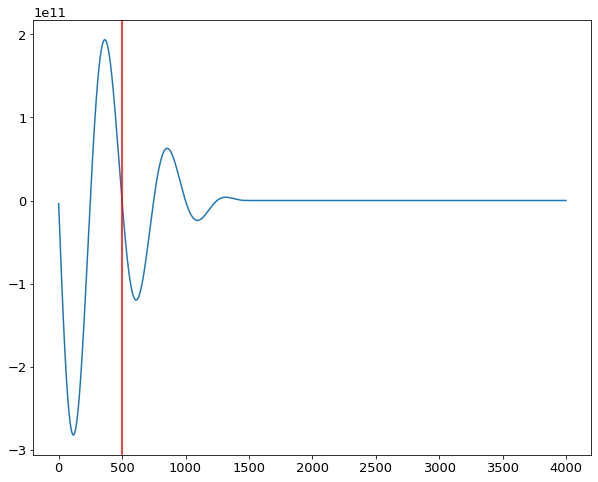

ValueError: x and y must have same first dimension, but have shapes (3000,) and (4000,)

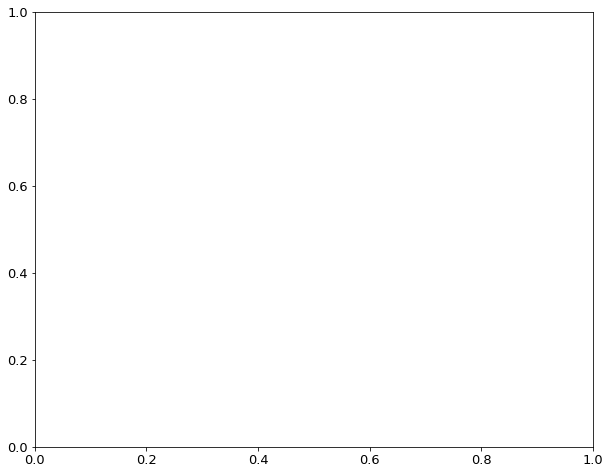

In [256]:
Ey = get_field(10)
plt.plot(Ey)
plt.axvline(500, color="red")
plt.show()

Ey_f = np.abs(np.fft.fft(Ey))
Ey_f = np.fft.fftshift(Ey_f)
plt.plot(np.linspace(0, 1, 3000), Ey_f/np.max(Ey_f))
plt.axvline(500, color="red")
plt.xlim(0,1)
plt.ylim(0,1);

In [ ]:
Et1 = []
Et2 = []
d = []
all_field = []
for i in range(len(all_files)):
    data = get_field(i)
    all_field.append(data)
    Et1.append(data[300])
    Et2.append(data[1200])
    data = sdf.read(all_files[i])
    d.append(data.Derived_Number_Density_Electron.data)

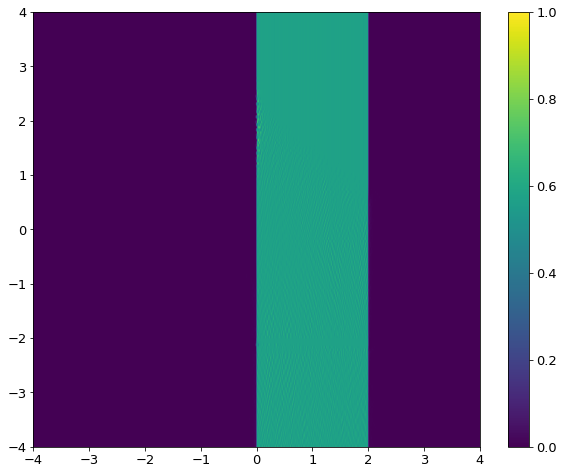

In [ ]:
plt.imshow(d/np.max(d), aspect="auto", extent=EXTENT)
cmap = colors.ListedColormap(["white", "black"])
plt.colorbar(cmap=cmap)

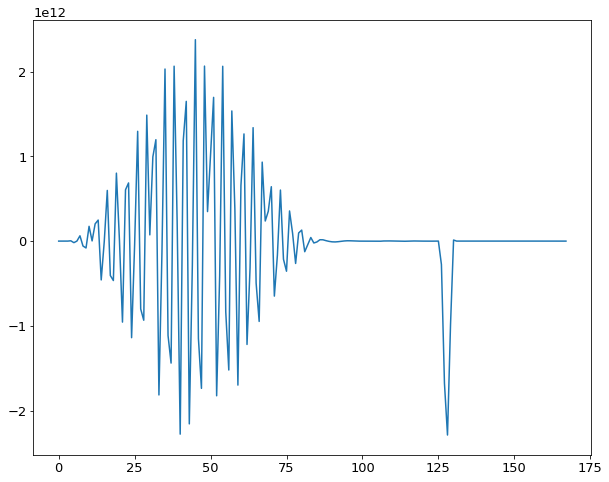

In [ ]:
plt.plot(Et1)

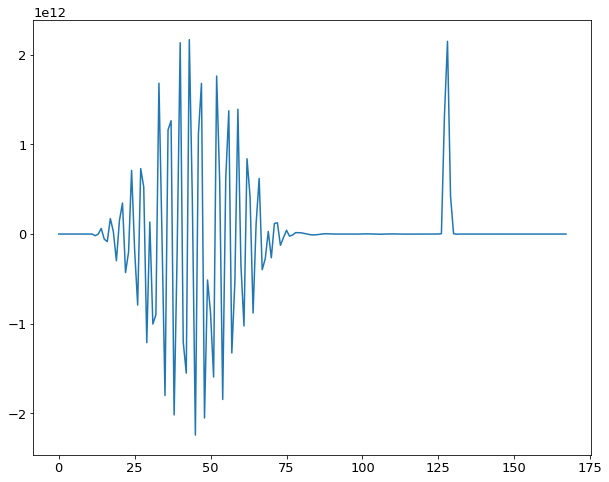

In [ ]:
plt.plot(Et2)

(0.0, 1.0)

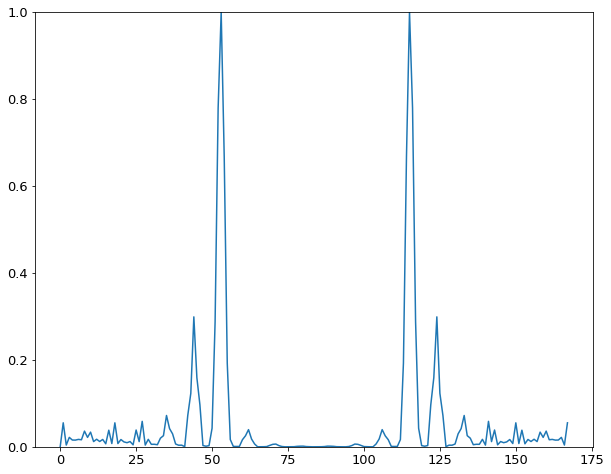

In [ ]:
eyt = np.abs(np.fft.fft(np.array(Et1)))
# eyt = np.fft.fftshift(eyt)
plt.plot(eyt**2/np.max(eyt**2))
plt.ylim(0,1)

In [ ]:
omega_0 = 2*np.pi*299792458/1e-6

In [ ]:
t = np.arange(1,len(all_files)+1)
omega = 2*np.pi*1e15/(t)
omega = omega/omega_0
assert len(omega)==len(Et1)

In [ ]:
max(omega)

3.3356409519815204

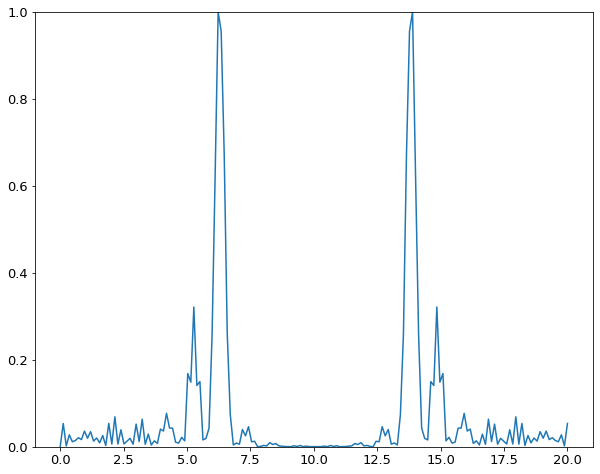

In [ ]:
eyt = np.array(Et2)/Er
eyt = np.abs(np.fft.fft(eyt))
plt.plot(np.linspace(0,20, len(eyt)), eyt**2/np.max(eyt**2))
plt.ylim(0,1);

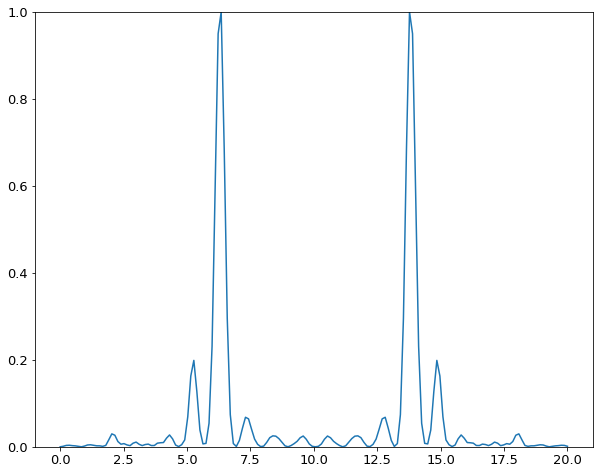

In [ ]:
eyt = np.array(Et2)/Er
eyt = np.abs(np.fft.fft(eyt))
plt.plot(np.linspace(0,20, len(eyt)), eyt**2/np.max(eyt**2))
plt.ylim(0,1);

In [ ]:
def plot_field(file, component = "y",save=True, dir=".temp"):
    raw_data = sdf.read(file)
    image_name = file.split(".sdf")[0]
    comp = {
        "x":raw_data.Electric_Field_Ex,
        "y":raw_data.Electric_Field_Ey,
        "z":raw_data.Electric_Field_Ez,
    }
    field = comp[component].data
    t = raw_data.Header['time']*1e15
    x = np.linspace(-6,6,len(field))
    plt.plot(x, field)
    plt.axvline(0, color="red", lw=2)
    plt.axvline(2, color="red", lw=2)
    plt.xlabel("x [$\mu m$]")
    plt.ylabel("E [$\\frac{N}{C}$]")
    plt.title(f"E{component} at {t:.0f} fs")
    if save:
        plt.savefig(dir+"/"+image_name+".jpg")
        plt.close()
    else:
        plt.show()

In [ ]:
def make_video(dir=".temp", name="video.mp4", delete=False):
    images = []
    files = glob.glob(f"{dir}/*.jpg")
    for file in files:
        images.append(imageio.imread(file))
    if name.endswith(".mp4"):
        imageio.mimsave(f"{dir}/{name}", images)
    else:
        imageio.mimsave(f"{dir}/{name}", images, duration=0.1)
    if delete:
        for file in files:
            os.remove(file)

In [ ]:
# i=0
# for file in all_files:
#     print(i, end="\r")
#     plot_field(file)
#     i+=1

In [ ]:
# make_video(delete=True)

In [ ]:
data = sdf.read(all_files[1])

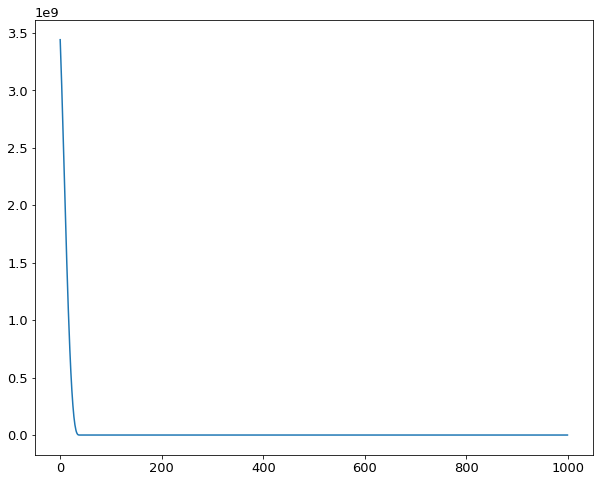

In [ ]:
plt.plot(data.Electric_Field_Ey.data)